In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas

In [4]:
import pandas as pd

Data loading


In [6]:
path = "/sample_sales_data (1).csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


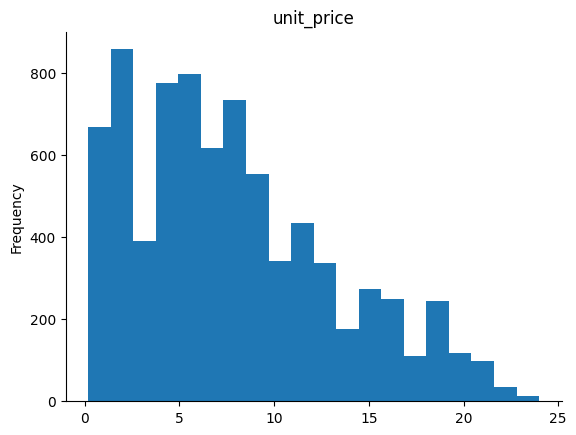

In [7]:
# @title unit_price

from matplotlib import pyplot as plt
df['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

 Visualisation


In [ ]:
!pip install seaborn

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
import seaborn as sns

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  # Exclude non-numeric columns
  numeric_data = data.select_dtypes(include=["number"])
  corr = numeric_data.corr()
  corr.style.background_gradient(cmap='coolwarm')

Column: unit_price has 64 unique values

unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64


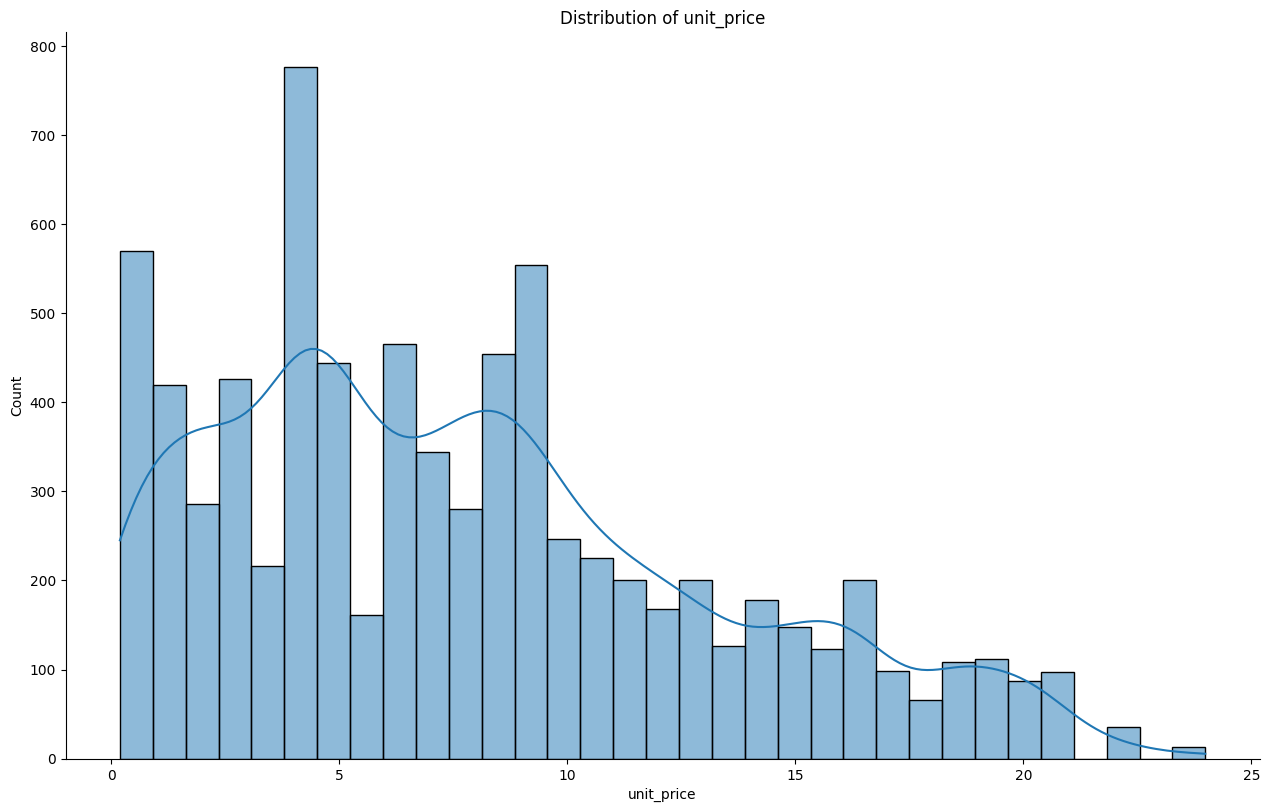

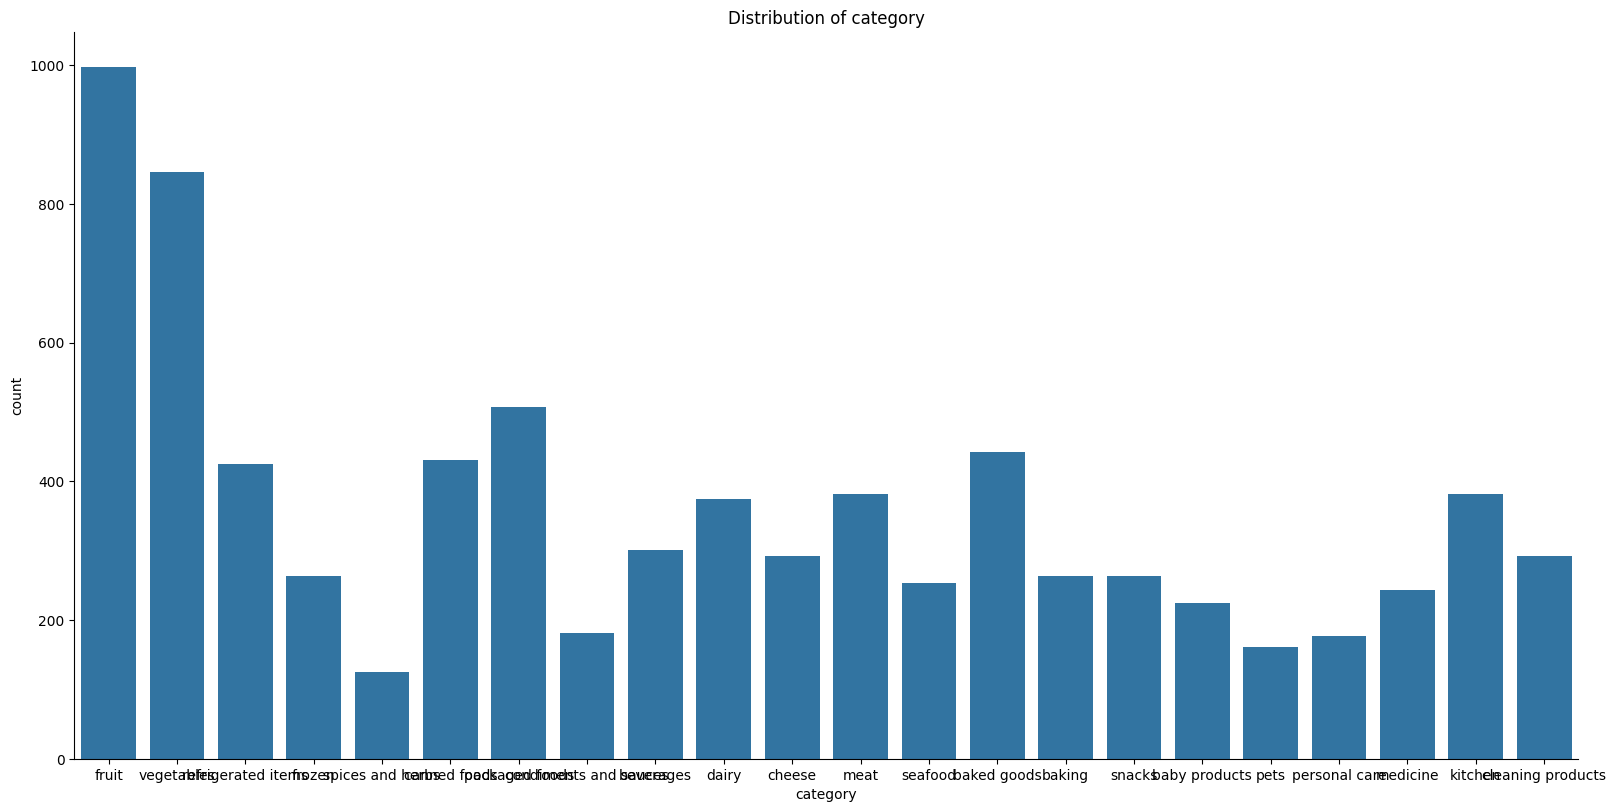

In [ ]:
data = pd.DataFrame(df)
data.head()
correlation_plot(data)
plot_continuous_distribution(data, 'unit_price')
get_unique_values(data, 'unit_price')
plot_categorical_distribution(data, 'category')






In [ ]:
import pandas as pd
import seaborn as sns

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    if data is not None and column is not None:
        plot = sns.displot(data, x=column, kde=True, height=height, aspect=height/5)
        plot.set(title=f'Distribution of {column}')
    else:
        print("Please provide a valid DataFrame and column name.")

def get_unique_values(data, column):
    if data is not None and column is not None:
        num_unique_values = len(data[column].unique())
        value_counts = data[column].value_counts()
        print(f"Column: {column} has {num_unique_values} unique values\n")
        print(value_counts)
    else:
        print("Please provide a valid DataFrame and column name.")

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    if data is not None and column is not None:
        plot = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect)
        plot.set(title=f'Distribution of {column}')
    else:
        print("Please provide a valid DataFrame and column name.")

def correlation_plot(data: pd.DataFrame = None):
    if data is not None:
        # Drop non-numeric columns
        data = data.select_dtypes(include=['number'])

        # Calculate and plot the correlation matrix
        corr = data.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    else:
        print("Please provide a valid DataFrame.")


def high_total_product_sold(data, column):
    if data is not None and column is not None:
        max_sold = data[column].max()
        max_sold_product = data[data[column] == max_sold]

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Product', y=column, data=max_sold_product)
        plt.title('Product with Highest Total Units Sold')
        plt.xlabel('Product')
        plt.ylabel('Total Units Sold')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Please provide a valid DataFrame and column name.")

def low_total_product_sold(data, column):
    if data is not None and column is not None:
        min_sold = data[column].min()
        min_sold_product = data[data[column] == min_sold]

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(x='unit_price', y=column, data=min_sold_product)
        plt.title('Product with Lowest Total Units Sold')
        plt.xlabel('Product')
        plt.ylabel('Total Units Sold')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Please provide a valid DataFrame and column name.")

def average_total_amount(data, column):
    if data is not None and column is not None:
        avg_amount = data[column].mean()

        # Plotting
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.axvline(avg_amount, color='red', linestyle='--', label='Average Amount')
        plt.title('Distribution of Total Amount Sold')
        plt.xlabel('Total Amount Sold')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    else:
        print("Please provide a valid DataFrame and column name.")


Column: unit_price has 64 unique values

unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64


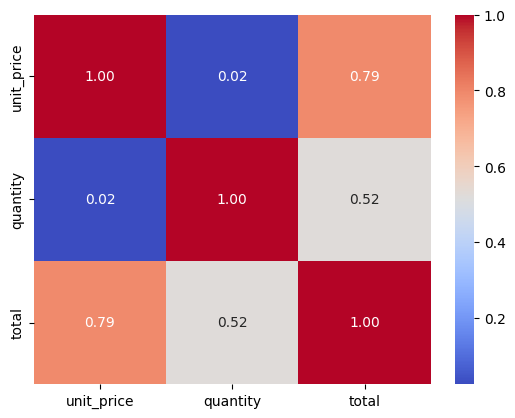

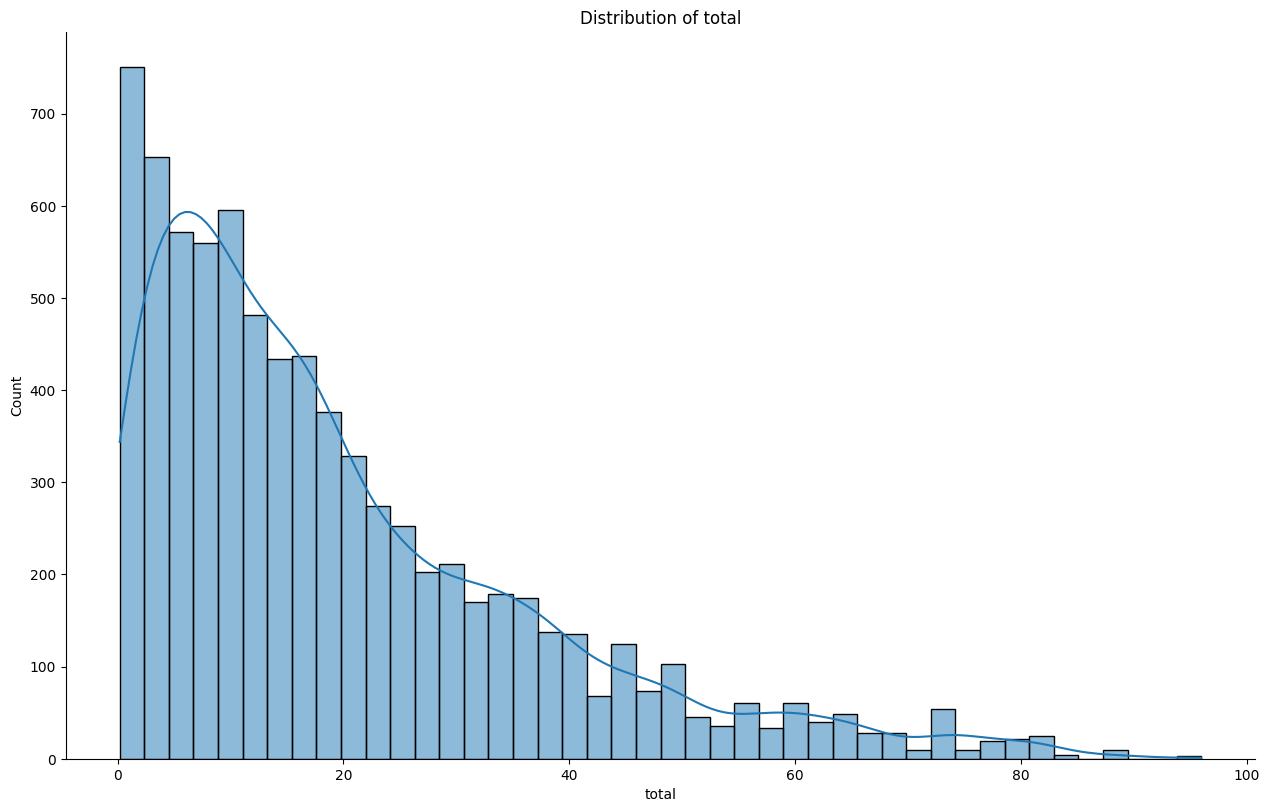

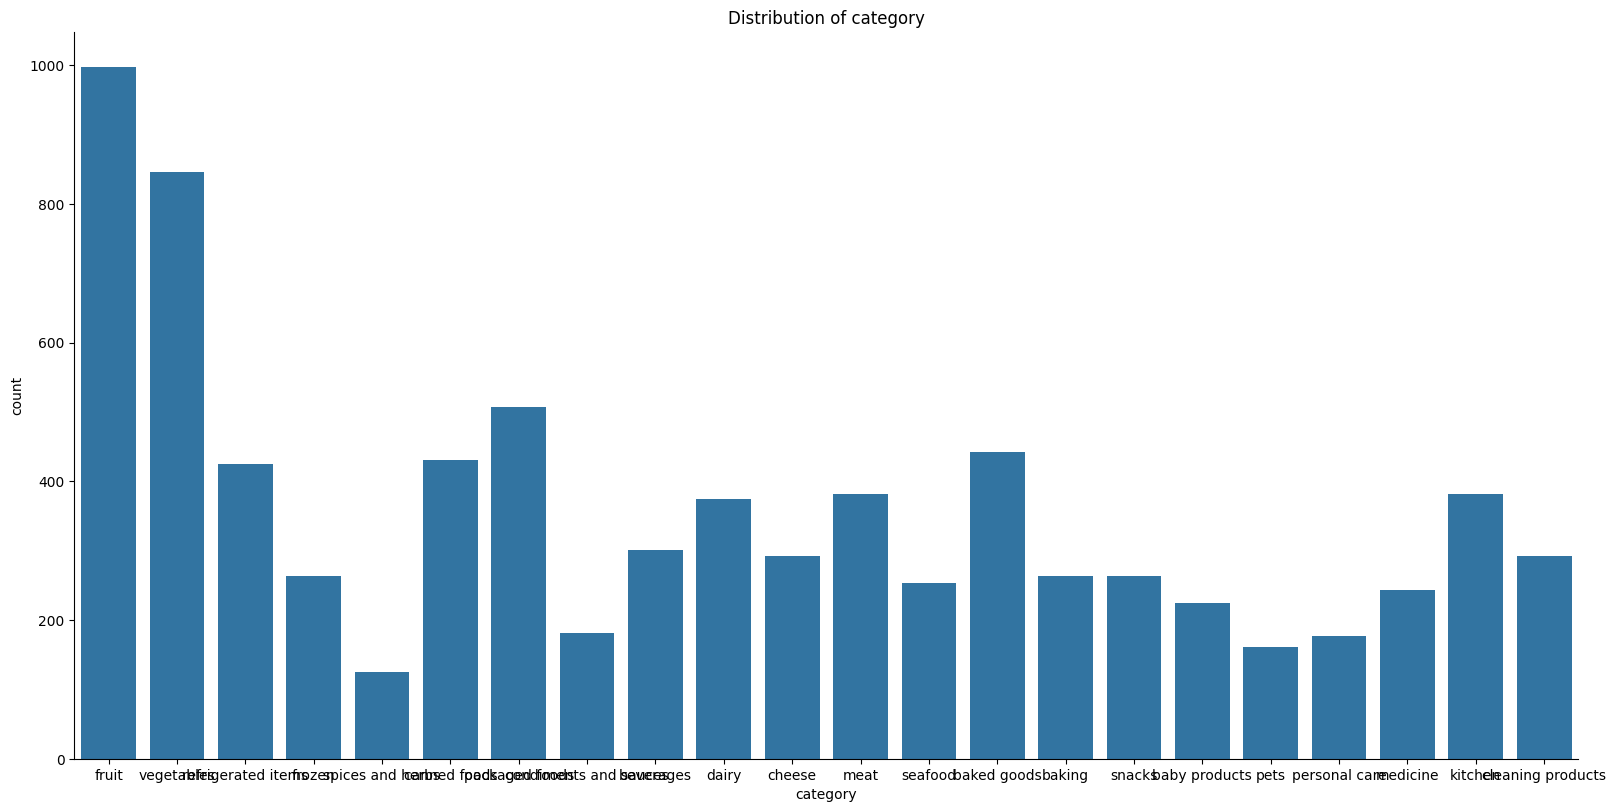

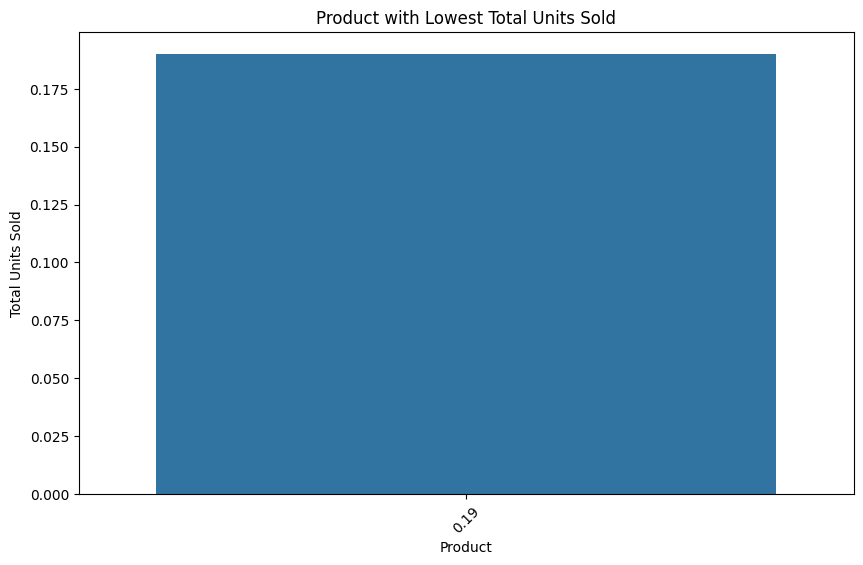

ValueError: Could not interpret value `Product` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
data = pd.DataFrame(df)
data.head()
correlation_plot(data)
plot_continuous_distribution(data, 'total')
get_unique_values(data, 'unit_price')
plot_categorical_distribution(data, 'category')
low_total_product_sold(data, 'total')
high_total_product_sold(data, 'total')
average_total_amount(data, 'total')


